## Case Study

BoomBikes, a automated bike-sharing system service provider - for individuals to rent bikes on a short term basis for a price or free In this people are allowed to borrow a bike from a 'dock' which is computerised meaning user enters payment information and system unlocks the bike. After usage bike can be returned to any dock belonging to same provider.

### Business Objective

To model the demand for shared bikes based on given independent variables, thereby management can know how the demands vary with different features. Therefore, this will be a good way to understand the demand dynamics of a new market.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
#import the file into dataset

df = pd.read_csv(r'C:\Bikes\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data preparation

In [3]:
#change to categorical variables
map_season     = {1:'spring',  2:'summer', 3:'fall', 4:'winter'}
map_weathersit = {
                    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 
                    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
                 }
map_yr      = {0:2018,  1:2019}
map_mnth    = {1:'Jan',  2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
map_weekday = {0:'Sunday', 1:'Monday',  2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

In [4]:
df['season'] = df['season'].map(map_season)
df['weathersit'] = df['weathersit'].map(map_weathersit)
df['yr'] = df['yr'].map(map_yr)
df['mnth'] = df['mnth'].map(map_mnth)
df['weekday'] = df['weekday'].map(map_weekday)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#drop the column which are not helpful for analysis

#Data Dictionary: instant - record index
del df["instant"]

#Data Dictionary: dteday - date
del df["dteday"]

#Data Dictionary: casual - count of casual users
del df["casual"]

#Data Dictionary: registered - count of registered users
del df["registered"]

In [6]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


In [7]:
#check total NA values by columns in dataframe

df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# Exploratory Data Analysis

## Univariant Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


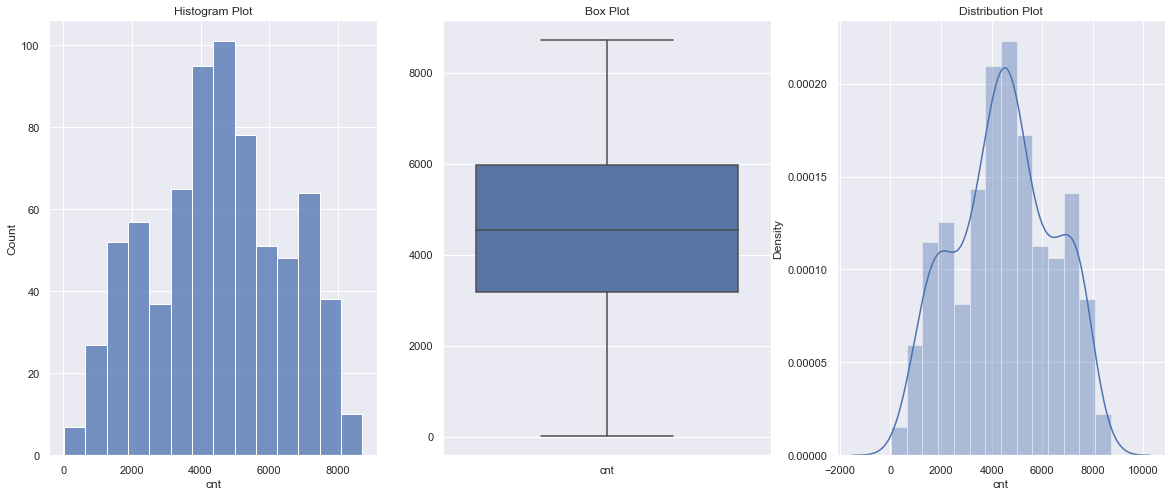

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64


In [8]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Histogram Plot")
sns.histplot(data =df["cnt"],ax=ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data =df[['cnt']],orient='v',ax=ax[1])
ax[2].set_title("Distribution Plot")
sns.distplot(df['cnt'] ,ax=ax[2] )
plt.show()

print(df['cnt'].describe())


#Observation: There doesnt seem to be any outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


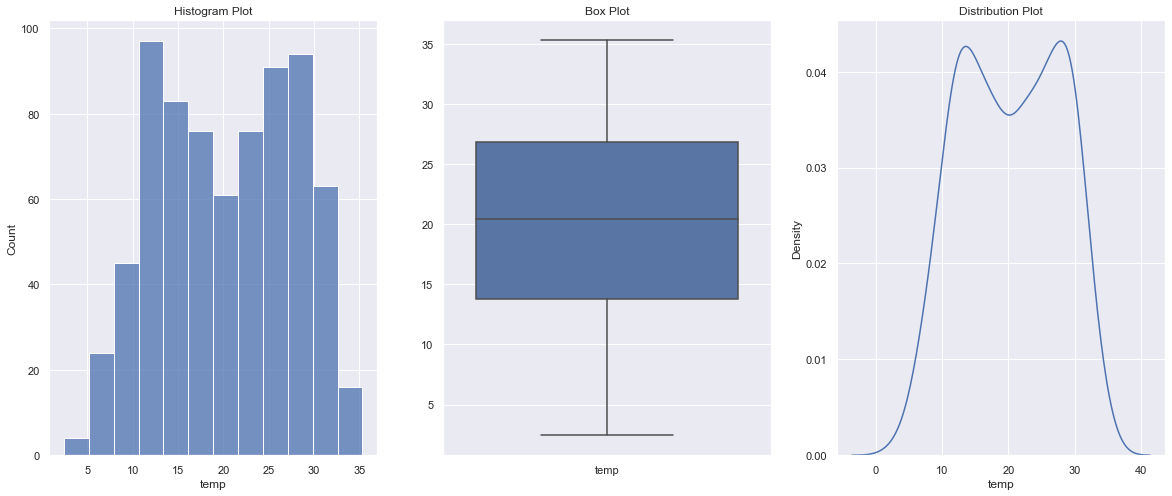

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


In [9]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Histogram Plot")
sns.histplot(data =df["temp"],ax=ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data =df[['temp']],orient='v',ax=ax[1])
ax[2].set_title("Distribution Plot")
sns.distplot(df['temp'],hist=False ,ax=ax[2] )
plt.show()

print(df['temp'].describe())


#Observation: the plot seems to have two peaks  around 10 and 30 celcius

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


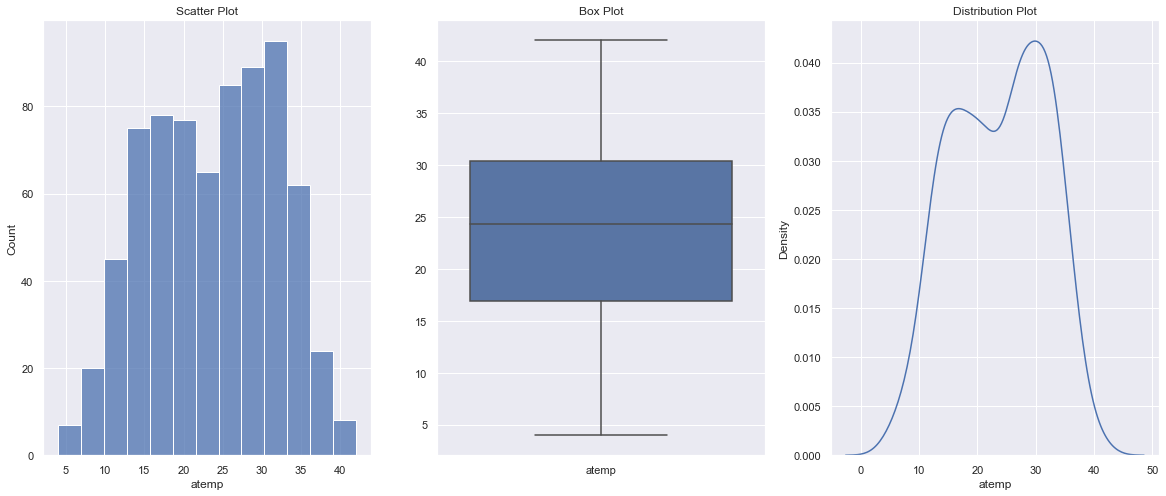

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64


In [10]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Scatter Plot")
sns.histplot(data =df["atemp"],ax=ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data =df[['atemp']],orient='v',ax=ax[1])
ax[2].set_title("Distribution Plot")
sns.distplot(df['atemp'],hist=False ,ax=ax[2] )
plt.show()

print(df['atemp'].describe())


#Observation: the plot seems to have two peaks  around 15 and 35 celcius

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


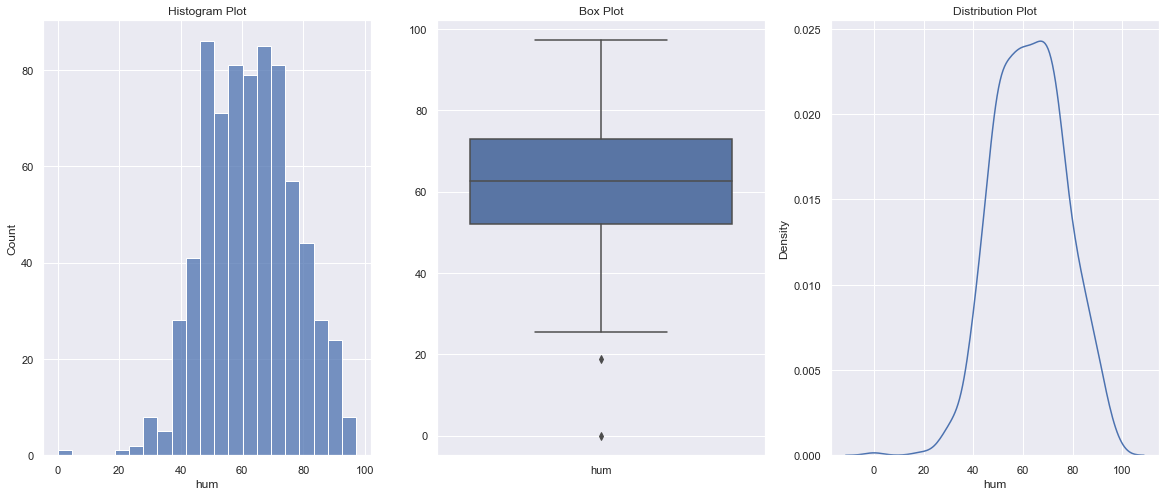

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64


In [11]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Histogram Plot")
sns.histplot(data =df["hum"],ax=ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data =df[['hum']],orient='v',ax=ax[1])
ax[2].set_title("Distribution Plot")
sns.distplot(df['hum'],hist=False ,ax=ax[2] )
plt.show()

print(df['hum'].describe())


#Observation: the plot seems to have peak around 50 - 80

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


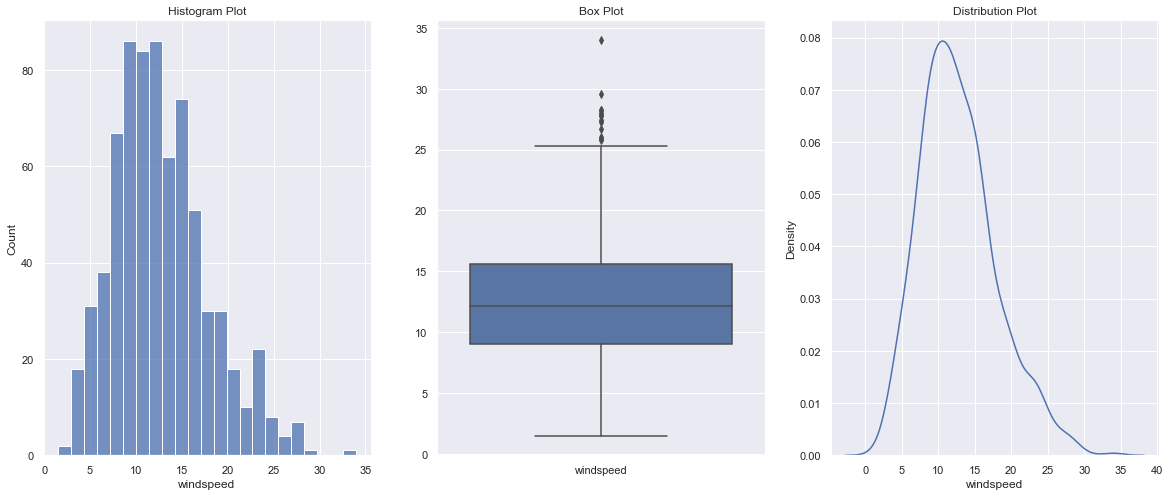

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


In [12]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Histogram Plot")
sns.histplot(data =df["windspeed"],ax=ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data =df[['windspeed']],orient='v',ax=ax[1])
ax[2].set_title("Distribution Plot")
sns.distplot(df['windspeed'],hist=False ,ax=ax[2] )
plt.show()

print(df['windspeed'].describe())


#Observation: the plot seems to have peak around 10

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

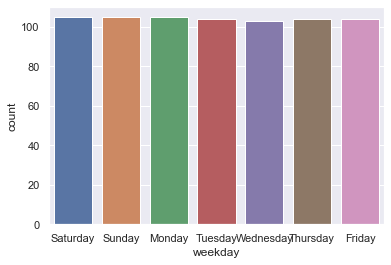

In [13]:
sns.countplot(df['weekday']) 

#Observation: count of records for each weekday is similar

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='count'>

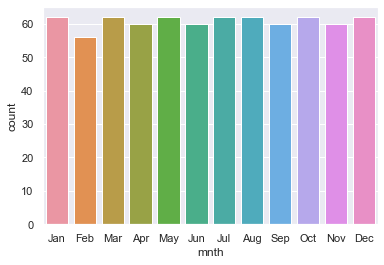

In [14]:
sns.countplot(df['mnth']) 

#Observation: count of records for feb is bit low

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

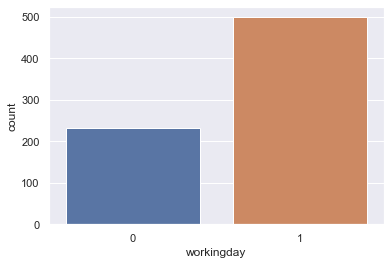

In [15]:
sns.countplot(df['workingday']) 

#Observation: count of records for workingday is high, off day/holiday/weekend is less 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

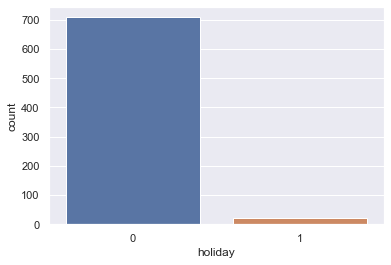

In [16]:
sns.countplot(df['holiday']) 

#Observation: count of records for non holiday is high, holiday is less 
# but generally in a year there are less holidays compared to non holiday, in line with general observation

## Multivariant Analysis

In [17]:
df.pivot_table(values = "cnt", 
               index = "season", 
               columns = "yr", 
               fill_value = 0,
               aggfunc=np.sum).round(2)


#Observation: there is more business in 2019 fall compared to 2018 fall

yr,2018,2019
season,,
fall,419650,641479
spring,150000,319514
summer,347316,571273
winter,326137,515476


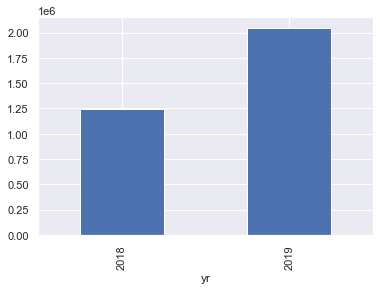

In [18]:
total_cnt = df.groupby(["yr"])["cnt"].sum()
total_cnt.plot(kind = "bar")

plt.show()

#Observation: there seems to be more business in 2019 compared to 2018

In [19]:
df.pivot_table(values = "cnt", 
               index = "yr", 
               columns = "season", 
               fill_value = 0,
               aggfunc=np.sum).round(2)

#Observation: there seems to be more business in 2019 compared to 2018

season,fall,spring,summer,winter
yr,,,,
2018,419650,150000,347316,326137
2019,641479,319514,571273,515476


In [20]:
df.pivot_table(values = "cnt", 
               index = "weathersit", 
               columns = "season", 
               fill_value = 0,
               aggfunc=np.sum).round(2)

#Observation: there are more people renting bikes when the weather is Clear, Few clouds, Partly cloudy, Partly cloudy

season,fall,spring,summer,winter
weathersit,,,,
"Clear, Few clouds, Partly cloudy, Partly cloudy",799443,312036,626986,519487
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",11007,3739,3507,19616
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",250679,153739,288096,302510


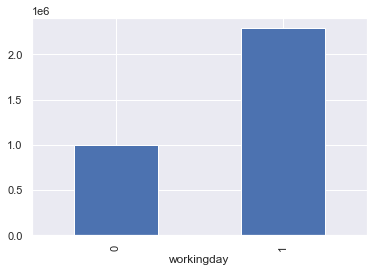

In [21]:
total_cnt = df.groupby(["workingday"])["cnt"].sum()
total_cnt.plot(kind = "bar")

plt.show()

#Observation: there are more people renting bikes on working days

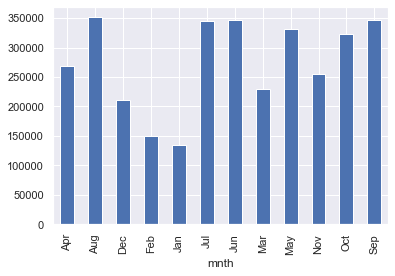

In [22]:
total_cnt = df.groupby(["mnth"])["cnt"].sum()
total_cnt.plot(kind = "bar")
plt.show()

#Observation : May to October has more bike riders.

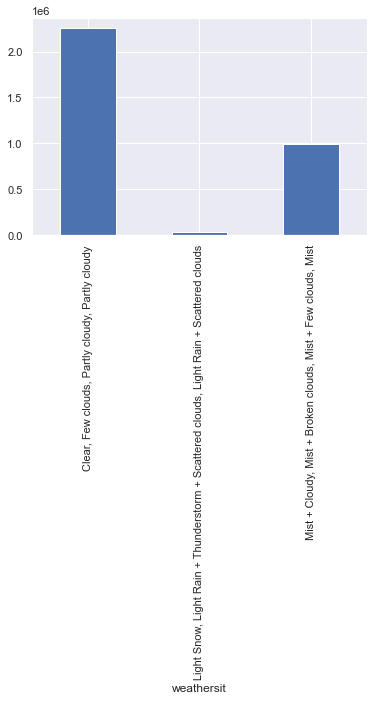

In [23]:
total_cnt = df.groupby(["weathersit"])["cnt"].sum()
total_cnt.plot(kind = "bar")

plt.show()

#Observation: there are more people renting bikes when the weather is Clear, Few clouds, Partly cloudy, Partly cloudy

In [24]:
#binning 

df['quantile_temp']= pd.qcut(df['temp'], q=4, precision=0)
df['quantile_hum']= pd.qcut(df['hum'], q=4, precision=0)
df['quantile_windspeed']= pd.qcut(df['windspeed'], q=4, precision=0)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,quantile_temp,quantile_hum,quantile_windspeed
0,spring,2018,Jan,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985,"(14.0, 20.0]","(73.0, 97.0]","(9.0, 12.0]"
1,spring,2018,Jan,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801,"(14.0, 20.0]","(63.0, 73.0]","(16.0, 34.0]"
2,spring,2018,Jan,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349,"(1.0, 14.0]","(-1.0, 52.0]","(16.0, 34.0]"
3,spring,2018,Jan,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562,"(1.0, 14.0]","(52.0, 63.0]","(9.0, 12.0]"
4,spring,2018,Jan,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600,"(1.0, 14.0]","(-1.0, 52.0]","(12.0, 16.0]"


In [25]:
df.pivot_table(values = "cnt", 
               index = "weathersit", 
               columns = "quantile_temp", 
               fill_value = 0,
               aggfunc=np.sum).round(2)

#Observation: there are highest bike riders when weather is Clear, Few clouds, Partly cloudy, Partly cloudy and 
#lowest bikes riders when there is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

quantile_temp,"(1.0, 14.0]","(14.0, 20.0]","(20.0, 27.0]","(27.0, 35.0]"
weathersit,,,,
"Clear, Few clouds, Partly cloudy, Partly cloudy",325085,484830,648059,799978
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",5428,11955,20486,0
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",148046,267523,349036,230419


<AxesSubplot:xlabel='quantile_temp'>

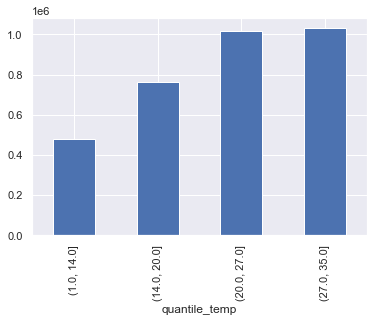

In [26]:
cnt_temp = df.groupby("quantile_temp")["cnt"].sum()
cnt_temp.plot(kind = "bar")

#Observation: there are more people renting bikes when the temperatures are between 27 to 35 degree Celsius

<AxesSubplot:xlabel='quantile_hum'>

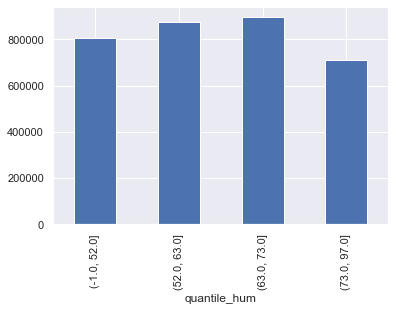

In [27]:
cnt_temp = df.groupby("quantile_hum")["cnt"].sum()
cnt_temp.plot(kind = "bar")

#Observation: there are more people renting bikes when the humidity is in between 63 to 73
# Again with increase in hum beyond 73 there is decrease in bike users

<AxesSubplot:xlabel='quantile_windspeed'>

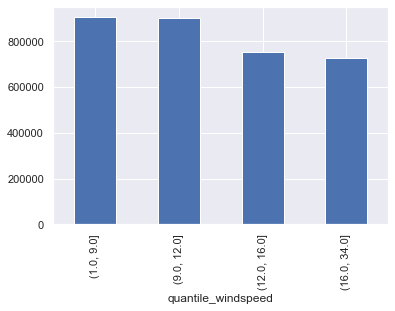

In [28]:
cnt_temp = df.groupby("quantile_windspeed")["cnt"].sum()
cnt_temp.plot(kind = "bar")

#Observation: there are more people renting bikes when the windspeed is in between 1 to 12
# With increase in windspeed there is decrease in bike users.

<AxesSubplot:xlabel='temp', ylabel='cnt'>

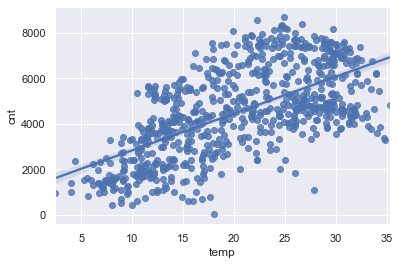

In [29]:
sns.regplot(x='temp', y ='cnt', data = df)

#Observation: theres a straight line and appropriate for linear regression and all the data points were closer to the line

<AxesSubplot:xlabel='hum', ylabel='cnt'>

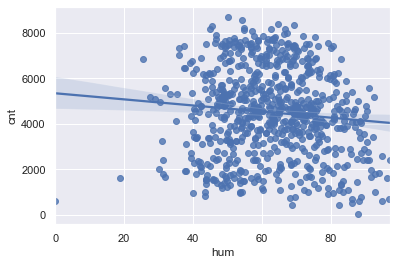

In [30]:
sns.regplot(x='hum', y ='cnt', data = df)

#Observation: data points are widespread and slope is also somewhat inversely proportionate

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

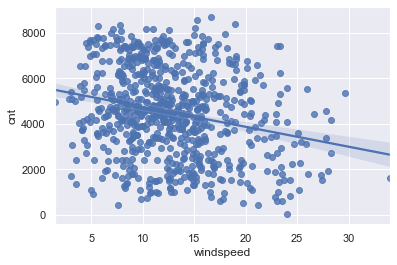

In [31]:
sns.regplot(x='windspeed', y ='cnt', data = df)

#Observation: data points are widespread and slope is also clearly inversely proportionate

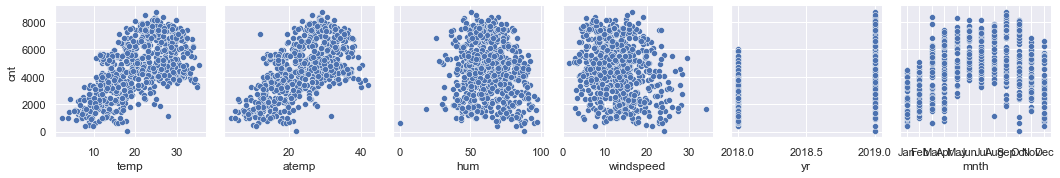

In [32]:
sns.pairplot( data =df,
              x_vars=['temp','atemp','hum','windspeed','yr','mnth'], 
              y_vars ='cnt', diag_kind=None)

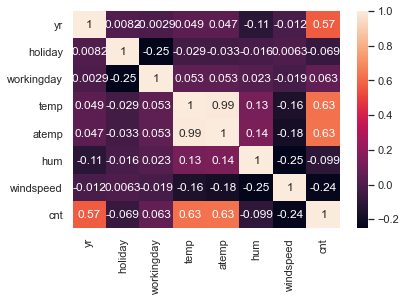

In [33]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#Observation: Temperature & feeling temperature has highest correlation with no of bike users.
#There is year followed by month which has second highest correlation to bike users.
#Windspeed and humidity are inversely proportionate to bike users.
#However humidity has very little inversely correlated.

# Modelling

In [34]:
#create dummy variables for season

season_dummy = pd.get_dummies(df['season'], drop_first = True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [35]:
#create dummy variables for weathersit

weathersit_dummy = pd.get_dummies(df['weathersit'], drop_first = True)
weathersit_dummy.head()

,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [36]:
#create dummy variables for mnth

mnth_dummy = pd.get_dummies(df['mnth'], drop_first = True)
mnth_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [37]:
#create dummy variables for workingday

weekday_dummy = pd.get_dummies(df['weekday'], drop_first = True)
weekday_dummy.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [38]:
df = pd.concat([df,season_dummy,weathersit_dummy,mnth_dummy,weekday_dummy], axis = 1)
df = df.drop(['season','weathersit','weekday','mnth','quantile_temp','quantile_hum','quantile_windspeed'], axis = 1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df.dtypes

yr                                                                                           int64
holiday                                                                                      int64
workingday                                                                                   int64
temp                                                                                       float64
atemp                                                                                      float64
hum                                                                                        float64
windspeed                                                                                  float64
cnt                                                                                          int64
spring                                                                                       uint8
summer                                                                                       uint8
winter    

In [40]:
#Split the dataset into train test

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100 )
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [41]:
#Scaling continuous variables

vars = ['yr','holiday','workingday','temp','atemp','hum','windspeed']
scaler = MinMaxScaler()

df_train[vars] = scaler.fit_transform(df_train[vars])
df_train.head()

<ipython-input-41-c3f5aa3848ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[vars] = scaler.fit_transform(df_train[vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0.0,0.0,1.0,0.345824,0.318819,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,0,0


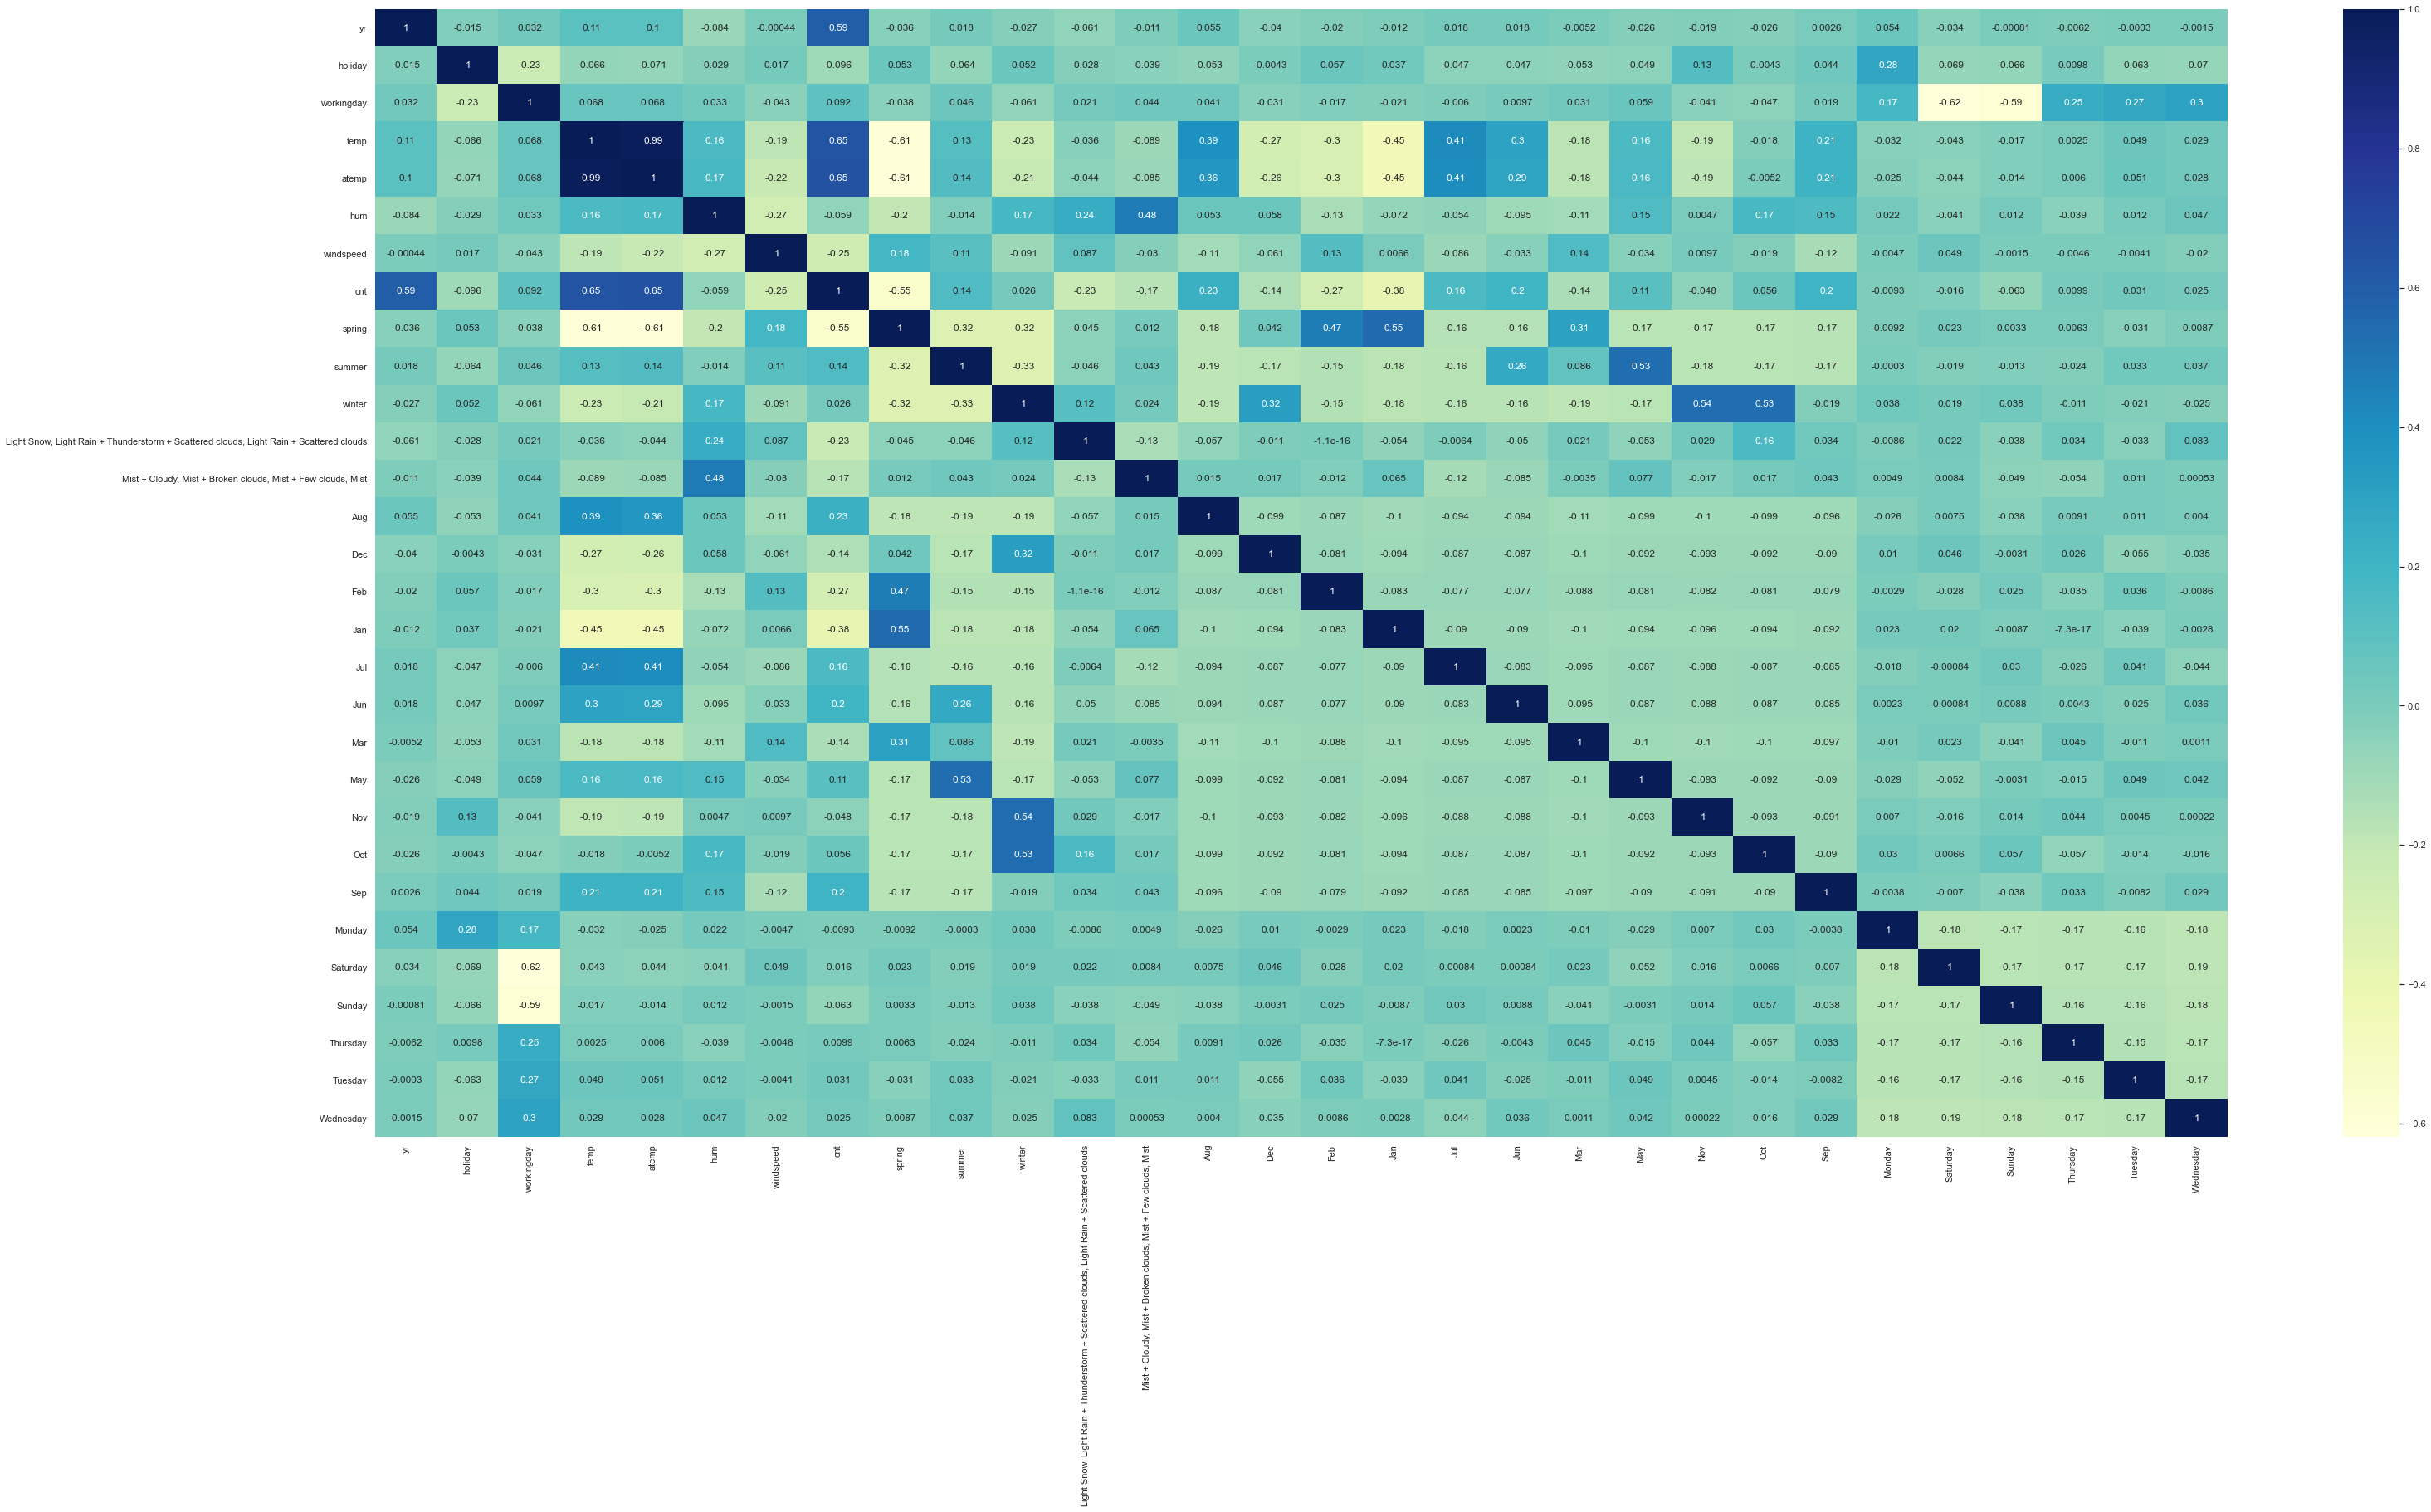

In [42]:
#check the correlation between variables in dataset

plt.figure(figsize=(50,25))
sns.heatmap(df_train.corr(), annot= True, cmap='YlGnBu')
plt.show()

In [43]:
df_train.shape

(510, 30)

In [44]:
# remove cnt variable as demand or cnt is the variable we want to predict.

y_train = df_train.pop('cnt')
X_train = df_train

In [45]:
#train and fit 

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.81e-180
Time:                        13:23:13   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2132.3460    307.054      6.945      0.000    1529.012    2735.680
yr                                                                                       2021.2265     70.196     28.794      0.000    1883.299    2159.155
holiday                                                                                    99.0718    209.894      0.472      0.637    -313.350     511.494
workingday                                                                                841.2011    106.806      7.876      0.000     631.337    1051.065
temp                                                                                     3372.3586   1236.595      2.727      0.007     942.564    5802.153
atemp                                                                                     513.2207   1203.335      0.426      0.670   -1851.222    2877.663
hum                                                                                     -1321.3195    335.550     -3.938      0.000   -1980.645    -661.994
windspeed                                                                               -1595.8864    229.236     -6.962      0.000   -2046.314   -1145.458
spring                                                                                   -394.2228    260.924     -1.511      0.131    -906.915     118.469
summer                                                                                    368.2736    227.759      1.617      0.107     -79.252     815.799
winter                                                                                    930.7444    243.295      3.826      0.000     452.692    1408.796
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -2216.2460    230.125     -9.631      0.000   -2668.421   -1764.071
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -517.3529     90.743     -5.701      0.000    -695.654    -339.052
Aug                                                                                       193.5713    294.433      0.657      0.511    -384.962     772.104
Dec                                                                                      -384.8315    292.519     -1.316      0.189    -959.605     189.942
Feb                                                                                      -280.8921    286.571     -0.980      0.327    -843.977     282.193
Jan                                                                                      -548.1528    292.204     -1.87

In [46]:
# Check VIF Values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
24,Saturday,19.71
25,Sunday,18.34
7,spring,10.77
9,winter,9.46
8,summer,8.29
20,Nov,6.79
21,Oct,6.47


In [47]:
X_train.shape

(510, 29)

In [48]:
# drop atemp which has High P-value (0.670) and High VIF (56.03)

X = X_train.drop('atemp', axis = 1)

In [49]:
#train and fit 

X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.00e-181
Time:                        13:23:13   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     482   BIC:                             8372.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2130.6795    306.769      6.946      0.000    1527.910    2733.449
yr                                                                                       2020.3471     70.106     28.819      0.000    1882.596    2158.098
holiday                                                                                    91.6888    209.001      0.439      0.661    -318.977     502.355
workingday                                                                                840.3685    106.697      7.876      0.000     630.719    1050.018
temp                                                                                     3871.0579    402.069      9.628      0.000    3081.034    4661.082
hum                                                                                     -1316.6056    335.084     -3.929      0.000   -1975.011    -658.201
windspeed                                                                               -1616.8029    223.739     -7.226      0.000   -2056.426   -1177.179
spring                                                                                   -389.6974    260.487     -1.496      0.135    -901.528     122.133
summer                                                                                    373.7710    227.201      1.645      0.101     -72.655     820.197
winter                                                                                    935.5337    242.829      3.853      0.000     458.399    1412.668
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -2223.7163    229.263     -9.699      0.000   -2674.195   -1773.238
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -517.6165     90.664     -5.709      0.000    -695.761    -339.472
Aug                                                                                       177.1104    291.644      0.607      0.544    -395.941     750.162
Dec                                                                                      -384.8529    292.271     -1.317      0.189    -959.135     189.430
Feb                                                                                      -281.9792    286.316     -0.985      0.325    -844.561     280.603
Jan                                                                                      -550.3311    291.912     -1.885      0.060   -1123.908      23.245
Jul                                                                                      -294.2054    303.521     -0.96

In [50]:
# Check VIF Values

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,85.54
23,Saturday,19.71
24,Sunday,18.34
6,spring,10.75
8,winter,9.44
7,summer,8.27
3,temp,7.08
19,Nov,6.79
20,Oct,6.47
11,Aug,6.36


In [51]:
# drop mar High P-value 0.834 High VIF 6.47

X1 = X.drop('Oct', axis = 1)

In [52]:
#train and fit 

X_train_sm = sm.add_constant(X1)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.93e-182
Time:                        13:23:13   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     483   BIC:                             8366.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2152.7852    287.905      7.477      0.000    1587.084    2718.487
yr                                                                                       2019.7343     69.976     28.863      0.000    1882.240    2157.229
holiday                                                                                    99.1806    205.738      0.482      0.630    -305.071     503.432
workingday                                                                                845.0720    104.223      8.108      0.000     640.286    1049.858
temp                                                                                     3868.0891    401.423      9.636      0.000    3079.338    4656.840
hum                                                                                     -1308.0617    332.281     -3.937      0.000   -1960.957    -655.166
windspeed                                                                               -1616.4857    223.512     -7.232      0.000   -2055.662   -1177.310
spring                                                                                   -389.6410    260.229     -1.497      0.135    -900.962     121.680
summer                                                                                    353.7409    206.061      1.717      0.087     -51.145     758.627
winter                                                                                    960.4996    211.609      4.539      0.000     544.711    1376.288
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -2222.4718    228.960     -9.707      0.000   -2672.352   -1772.592
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -518.1387     90.540     -5.723      0.000    -696.039    -340.238
Aug                                                                                       147.3813    254.825      0.578      0.563    -353.322     648.084
Dec                                                                                      -433.6815    177.284     -2.446      0.015    -782.025     -85.338
Feb                                                                                      -312.8046    245.691     -1.273      0.204    -795.560     169.950
Jan                                                                                      -581.5592    251.056     -2.316      0.021   -1074.855     -88.263
Jul                                                                                      -323.4975    269.394     -1.20

In [53]:
# Check VIF Values

vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,76.07
22,Saturday,17.49
23,Sunday,16.31
6,spring,10.75
8,winter,7.18
3,temp,7.08
7,summer,6.81
11,Aug,4.86
15,Jul,4.42
14,Jan,4.37


In [54]:
# drop Mar High Pvalue 0.947 low VIF 2.54

X2 = X1.drop('Mar', axis = 1)

In [55]:
#train and fit 

X_train_sm = sm.add_constant(X2)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.74e-183
Time:                        13:23:14   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     484   BIC:                             8360.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2148.6737    280.972      7.647      0.000    1596.598    2700.749
yr                                                                                       2019.6410     69.890     28.897      0.000    1882.316    2156.966
holiday                                                                                    98.7367    205.419      0.481      0.631    -304.886     502.359
workingday                                                                                843.7645    102.266      8.251      0.000     642.823    1044.706
temp                                                                                     3872.6890    395.076      9.802      0.000    3096.412    4648.966
hum                                                                                     -1308.5162    331.870     -3.943      0.000   -1960.600    -656.432
windspeed                                                                               -1615.5607    222.854     -7.249      0.000   -2053.441   -1177.680
spring                                                                                   -396.1430    241.127     -1.643      0.101    -869.927      77.641
summer                                                                                    353.3276    205.756      1.717      0.087     -50.957     757.613
winter                                                                                    961.7923    210.508      4.569      0.000     548.171    1375.414
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -2222.2856    228.707     -9.717      0.000   -2671.667   -1772.904
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -518.1511     90.446     -5.729      0.000    -695.867    -340.435
Aug                                                                                       149.2911    252.959      0.590      0.555    -347.742     646.324
Dec                                                                                      -428.6036    160.027     -2.678      0.008    -743.038    -114.169
Feb                                                                                      -302.2910    188.584     -1.603      0.110    -672.836      68.254
Jan                                                                                      -570.5615    189.470     -3.011      0.003    -942.847    -198.276
Jul                                                                                      -321.9279    268.093     -1.20

In [56]:
# Check VIF Values

vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,72.24
21,Saturday,16.60
22,Sunday,15.58
6,spring,9.25
8,winter,7.12
3,temp,6.87
7,summer,6.81
11,Aug,4.80
15,Jul,4.39
1,holiday,3.96


In [57]:
# drop workingday High VIF 72.24 Low P Value 0.000

X3 = X2.drop('workingday', axis = 1)

In [58]:
#train and fit 

X_train_sm = sm.add_constant(X3)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.74e-183
Time:                        13:23:14   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     484   BIC:                             8360.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2992.4382    351.520      8.513      0.000    2301.745    3683.132
yr                                                                                       2019.6410     69.890     28.897      0.000    1882.316    2156.966
holiday                                                                                  -745.0279    230.314     -3.235      0.001   -1197.566    -292.490
temp                                                                                     3872.6890    395.076      9.802      0.000    3096.412    4648.966
hum                                                                                     -1308.5162    331.870     -3.943      0.000   -1960.600    -656.432
windspeed                                                                               -1615.5607    222.854     -7.249      0.000   -2053.441   -1177.680
spring                                                                                   -396.1430    241.127     -1.643      0.101    -869.927      77.641
summer                                                                                    353.3276    205.756      1.717      0.087     -50.957     757.613
winter                                                                                    961.7923    210.508      4.569      0.000     548.171    1375.414
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -2222.2856    228.707     -9.717      0.000   -2671.667   -1772.904
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -518.1511     90.446     -5.729      0.000    -695.867    -340.435
Aug                                                                                       149.2911    252.959      0.590      0.555    -347.742     646.324
Dec                                                                                      -428.6036    160.027     -2.678      0.008    -743.038    -114.169
Feb                                                                                      -302.2910    188.584     -1.603      0.110    -672.836      68.254
Jan                                                                                      -570.5615    189.470     -3.011      0.003    -942.847    -198.276
Jul                                                                                      -321.9279    268.093     -1.201      0.230    -848.697     204.842
Jun                                                                                        25.7279    197.042      0.13

In [59]:
# Check VIF Values

vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,35.83
3,hum,35.05
5,spring,8.14
7,winter,6.98
6,summer,6.08
4,windspeed,5.01
10,Aug,4.86
14,Jul,4.44
18,Sep,2.90
15,Jun,2.56


In [60]:
# drop Saturday High Pvalue 0.968 low VIF 2.18

X4 = X3.drop('Saturday', axis = 1)

In [61]:
#train and fit 

X_train_sm = sm.add_constant(X4)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.51e-184
Time:                        13:23:14   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     485   BIC:                             8353.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2989.9234    345.442      8.655      0.000    2311.176    3668.671
yr                                                                                       2019.6586     69.817     28.928      0.000    1882.478    2156.839
holiday                                                                                  -744.7645    229.982     -3.238      0.001   -1196.648    -292.881
temp                                                                                     3873.0795    394.548      9.817      0.000    3097.845    4648.314
hum                                                                                     -1308.6730    331.505     -3.948      0.000   -1960.036    -657.310
windspeed                                                                               -1615.8769    222.483     -7.263      0.000   -2053.026   -1178.728
spring                                                                                   -396.5243    240.688     -1.647      0.100    -869.445      76.396
summer                                                                                    352.9577    205.334      1.719      0.086     -50.497     756.412
winter                                                                                    961.4142    210.077      4.576      0.000     548.641    1374.187
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -2222.6295    228.309     -9.735      0.000   -2671.226   -1774.033
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -517.9857     90.258     -5.739      0.000    -695.330    -340.641
Aug                                                                                       148.8608    252.467      0.590      0.556    -347.204     644.926
Dec                                                                                      -428.6341    159.861     -2.681      0.008    -742.739    -114.529
Feb                                                                                      -302.0417    188.286     -1.604      0.109    -671.999      67.916
Jan                                                                                      -570.5100    189.271     -3.014      0.003    -942.402    -198.618
Jul                                                                                      -322.3441    267.613     -1.205      0.229    -848.168     203.480
Jun                                                                                        25.4248    196.692      0.12

In [62]:
# Check VIF Values

vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,35.66
3,hum,34.73
5,spring,7.88
7,winter,6.79
6,summer,5.88
4,windspeed,4.96
10,Aug,4.81
14,Jul,4.41
18,Sep,2.87
15,Jun,2.56


In [63]:
#drop temp High VIF 35.66 low P Value 0

X5 = X4.drop('temp', axis = 1)

In [64]:
#train and fit 

X_train_sm = sm.add_constant(X5)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     98.40
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.08e-166
Time:                        13:23:14   Log-Likelihood:                -4145.0
No. Observations:                 510   AIC:                             8338.
Df Residuals:                     486   BIC:                             8440.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    4585.3441    333.389     13.754      0.000    3930.283    5240.406
yr                                                                                       2138.8518     75.196     28.444      0.000    1991.102    2286.601
holiday                                                                                  -567.8097    250.761     -2.264      0.024   -1060.520     -75.099
hum                                                                                      -421.9155    348.852     -1.209      0.227   -1107.361     263.530
windspeed                                                                               -1524.3266    243.120     -6.270      0.000   -2002.023   -1046.631
spring                                                                                   -897.4110    257.262     -3.488      0.001   -1402.894    -391.928
summer                                                                                     10.5757    221.315      0.048      0.962    -424.276     445.427
winter                                                                                    732.3055    228.343      3.207      0.001     283.645    1180.966
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -2536.2492    247.249    -10.258      0.000   -3022.058   -2050.441
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -694.5048     96.738     -7.179      0.000    -884.581    -504.429
Aug                                                                                      1038.1137    257.741      4.028      0.000     531.689    1544.538
Dec                                                                                     -1031.4008    161.431     -6.389      0.000   -1348.589    -714.213
Feb                                                                                      -838.1308    197.080     -4.253      0.000   -1225.365    -450.896
Jan                                                                                     -1405.9901    184.899     -7.604      0.000   -1769.290   -1042.690
Jul                                                                                       810.8506    264.062      3.071      0.002     292.006    1329.695
Jun                                                                                      1051.6156    182.227      5.771      0.000     693.566    1409.666
May                                                                                       834.6271    171.683      4.86

In [65]:
# Check VIF Values

vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,hum,22.66
4,spring,7.80
6,winter,6.56
5,summer,5.74
3,windspeed,4.65
9,Aug,3.08
13,Jul,2.52
17,Sep,2.26
12,Jan,2.18
8,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.15


In [66]:
#Drop Summer High Pvalue 0.962 Low VIF 5.74

X6 = X5.drop('summer', axis = 1)

In [67]:
#train and fit 

X_train_sm = sm.add_constant(X6)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.03e-167
Time:                        13:23:15   Log-Likelihood:                -4145.0
No. Observations:                 510   AIC:                             8336.
Df Residuals:                     487   BIC:                             8433.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    4594.6931    269.672     17.038      0.000    4064.829    5124.557
yr                                                                                       2138.9343     75.099     28.481      0.000    1991.376    2286.493
holiday                                                                                  -568.0372    250.459     -2.268      0.024   -1060.151     -75.923
hum                                                                                      -422.0156    348.489     -1.211      0.226   -1106.742     262.711
windspeed                                                                               -1523.6948    242.511     -6.283      0.000   -2000.193   -1047.197
spring                                                                                   -906.7114    168.067     -5.395      0.000   -1236.937    -576.486
winter                                                                                    723.9956    147.833      4.897      0.000     433.526    1014.465
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -2536.7695    246.756    -10.280      0.000   -3021.607   -2051.932
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -694.3317     96.571     -7.190      0.000    -884.079    -504.585
Aug                                                                                      1028.6070    163.700      6.284      0.000     706.962    1350.252
Dec                                                                                     -1032.2744    160.228     -6.443      0.000   -1347.097    -717.452
Feb                                                                                      -838.3947    196.801     -4.260      0.000   -1225.078    -451.711
Jan                                                                                     -1406.2319    184.640     -7.616      0.000   -1769.022   -1043.442
Jul                                                                                       801.3859    174.461      4.593      0.000     458.596    1144.176
Jun                                                                                      1048.8927    172.912      6.066      0.000     709.147    1388.638
May                                                                                       835.6674    170.122      4.912      0.000     501.403    1169.932
Nov                                                                                      -857.8600    171.480     -5.00

In [68]:
# Check VIF Values

vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,hum,14.27
4,spring,4.68
3,windspeed,3.88
5,winter,3.78
11,Jan,2.18
7,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.09
0,yr,1.99
10,Feb,1.87
15,Nov,1.83
8,Aug,1.76


In [69]:
#Drop hum Low Pvalue 0.226 High VIF 14.27

X7 = X6.drop('hum', axis = 1)

In [70]:
#train and fit 

X_train_sm = sm.add_constant(X7)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.98e-168
Time:                        13:23:15   Log-Likelihood:                -4145.8
No. Observations:                 510   AIC:                             8336.
Df Residuals:                     488   BIC:                             8429.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    4334.3357    162.865     26.613      0.000    4014.332    4654.340
yr                                                                                       2146.5024     74.874     28.668      0.000    1999.386    2293.618
holiday                                                                                  -571.6078    250.562     -2.281      0.023   -1063.921     -79.295
windspeed                                                                               -1443.8441    233.486     -6.184      0.000   -1902.607    -985.081
spring                                                                                   -905.4457    168.144     -5.385      0.000   -1235.821    -575.071
winter                                                                                    699.9629    146.565      4.776      0.000     411.987     987.939
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -2651.7450    227.868    -11.637      0.000   -3099.468   -2204.022
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -758.8329     80.593     -9.416      0.000    -917.184    -600.482
Aug                                                                                      1008.0558    162.895      6.188      0.000     687.993    1328.119
Dec                                                                                     -1035.8289    160.277     -6.463      0.000   -1350.748    -720.910
Feb                                                                                      -828.7797    196.735     -4.213      0.000   -1215.331    -442.228
Jan                                                                                     -1402.4104    184.702     -7.593      0.000   -1765.319   -1039.502
Jul                                                                                       792.2066    174.380      4.543      0.000     449.578    1134.835
Jun                                                                                      1046.4914    172.983      6.050      0.000     706.608    1386.375
May                                                                                       800.9002    167.762      4.774      0.000     471.275    1130.526
Nov                                                                                      -845.9877    171.281     -4.939      0.000   -1182.528    -509.448
Sep                                                                                      1172.1134    161.248      7.26

In [71]:
# Check VIF Values

vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,spring,4.18
2,windspeed,3.43
4,winter,2.92
10,Jan,2.17
0,yr,1.95
9,Feb,1.87
14,Nov,1.83
8,Dec,1.55
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54
16,Monday,1.54


# Residual Analysis

In [72]:
#predict the demand / dependant variable on trained dataset

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    6756.619245
426    4447.884751
728    3071.280077
482    5449.876681
111    3025.425208
          ...     
578    7173.276332
53     2415.579413
350    2616.162419
79     2588.924747
520    6115.030430
Length: 510, dtype: float64

In [73]:
res = y_train - y_train_pred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'residual plot')

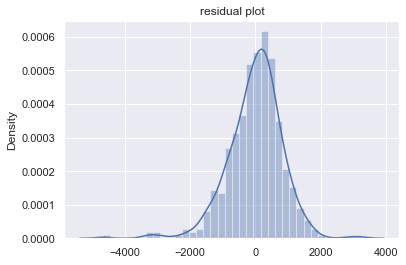

In [74]:
plt.figure()
sns.distplot(res)
plt.title("residual plot")

#Observation: model is working fine as the residuals are centered at zero and are normally distributed

# Predictions

In [75]:
#Sacle the variables on test dataset

vars = ['yr','holiday','workingday','temp','atemp','hum','windspeed']

df_test[vars] = scaler.transform(df_test[vars])
df_test.head()

<ipython-input-75-301746516d9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[vars] = scaler.transform(df_test[vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,6043,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,6211,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0.0,0.0,1.0,0.511964,0.496145,0.837699,0.334206,2659,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,4780,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0.0,0.0,1.0,0.817246,0.741471,0.314298,0.537414,4968,0,1,...,0,0,0,0,0,0,0,1,0,0


In [76]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,4560.559091,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,1904.968544,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#remove the demand or cnt variable as this is want we want to predict

y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
#add constant
X_test_sm = sm.add_constant(X_test)

#remove variables that were removed in trained set
X_test_sm = X_test_sm.drop(['atemp','Oct','Mar','workingday','Saturday','temp','summer','hum'], axis = 1)


In [79]:
#predict
y_test_pred = lr_model.predict(X_test_sm)

In [80]:
#evaluate the model
r2 = r2_score(y_true = y_test, y_pred = y_test_pred )
r2

0.8051359367755684

In [81]:
mean_squared_error(y_true = y_test, y_pred = y_test_pred )

703928.9156387817

### Conclusion:
R-squared for train dataset is 0.823 and R-squared for test dataset is 0.805, therefore the model is working fine.
